In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# add and set directory of the repository here
dire = '/home/mongardi/GIS_prior_knowledge'

In [2]:
import sys
sys.path.append(os.path.join(dire, "src"))
from  utils.utils import *
from get_wgis_scores import*

In [3]:
dire_kidney=  os.path.join(dire,'data/data_kidney')

In [4]:
dire_results = os.path.join(dire, 'results/gis_sensitibity_analysis')

In [5]:
dire_1 = os.path.join(dire,'/data/prior_knowledge/genes_and_ids_all_red.csv')
dire_2 = os.path.join(dire,'/data/prior_knowledge/gene_scores_norm_go.csv')

In [5]:

df = pd.read_csv(os.path.join(dire_kidney, 'Kidney_df_tr_coding_new.csv'))
df = shuffle(df, random_state=42)

In [6]:
df.set_index(df.columns[0], inplace=True)
df.head()

,disease,is_healthy,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
item_source_id,,,,,,,,,,,,,,,,,,,,,
2b768c1c-c655-47e0-96f2-05bcd8daa73a-geq,Kidney Renal Clear Cell Carcinoma,False,776,5065,631,356,1414,483,1650,32583,...,499973,77222,516184,717410,134268,102158,1651085,326043,81809,468870
932f313c-d695-4061-9abb-b1402aed8030-geq,Kidney Renal Clear Cell Carcinoma,True,800,3944,169,42,111,185,944,31690,...,881539,108561,605969,1227207,345061,122805,1866797,509303,152106,865253
037a8797-3399-411b-892c-fd608c8e3987-geq,Kidney Renal Clear Cell Carcinoma,False,55,3144,107,109,210,318,4154,22096,...,404986,30142,200055,386551,155833,70565,888477,253832,99498,351680
011f1e57-18d7-4cb0-8cb4-af7b151496b9-geq,Kidney Renal Clear Cell Carcinoma,False,174,4890,1453,659,501,688,6139,20666,...,402212,36479,325209,748352,215126,78428,1368108,160487,40699,545113
6f59075b-d162-4db4-ad9a-55e669635252-geq,Kidney Renal Clear Cell Carcinoma,True,221,1353,85,6,19,41,468,6554,...,565163,97159,519260,1031122,260997,91371,1253622,243394,75833,813635


In [7]:
X = df.drop(['disease','is_healthy'], axis=1)
y = y = df['is_healthy']
X.head()
y.head()

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
item_source_id,,,,,,,,,,,,,,,,,,,,,
2b768c1c-c655-47e0-96f2-05bcd8daa73a-geq,776,5065,631,356,1414,483,1650,32583,4,826,...,499973,77222,516184,717410,134268,102158,1651085,326043,81809,468870
932f313c-d695-4061-9abb-b1402aed8030-geq,800,3944,169,42,111,185,944,31690,19,270,...,881539,108561,605969,1227207,345061,122805,1866797,509303,152106,865253
037a8797-3399-411b-892c-fd608c8e3987-geq,55,3144,107,109,210,318,4154,22096,0,288,...,404986,30142,200055,386551,155833,70565,888477,253832,99498,351680
011f1e57-18d7-4cb0-8cb4-af7b151496b9-geq,174,4890,1453,659,501,688,6139,20666,0,1368,...,402212,36479,325209,748352,215126,78428,1368108,160487,40699,545113
6f59075b-d162-4db4-ad9a-55e669635252-geq,221,1353,85,6,19,41,468,6554,5,154,...,565163,97159,519260,1031122,260997,91371,1253622,243394,75833,813635


item_source_id
2b768c1c-c655-47e0-96f2-05bcd8daa73a-geq    False
932f313c-d695-4061-9abb-b1402aed8030-geq     True
037a8797-3399-411b-892c-fd608c8e3987-geq    False
011f1e57-18d7-4cb0-8cb4-af7b151496b9-geq    False
6f59075b-d162-4db4-ad9a-55e669635252-geq     True
Name: is_healthy, dtype: bool

In [8]:
rpm = X.div(X.sum(axis=1).values, axis=0) *1e6
rpm_log = np.log2(rpm + 1)

In [9]:
# training and test split
X_train, X_test,  y_train, y_test = train_test_split(rpm_log, y, random_state = 42,
                                        test_size = 0.2, stratify=y)

# Correlation Analysis

In [10]:
X_corr = X_train.corr()
np.fill_diagonal(X_corr.values, 0)

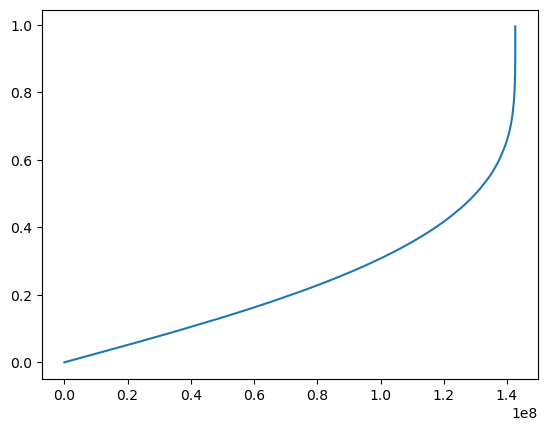

In [11]:
corr_values = X_corr.where(np.triu(np.ones(X_corr.shape), k=1).astype(bool)).stack().reset_index()
plt.plot(np.arange(1, corr_values.shape[0] +1), abs(corr_values[0]).sort_values().values)

(array([3.89637e+05, 3.89324e+05, 3.90020e+05, 3.90223e+05, 3.89152e+05,
        3.88620e+05, 3.88714e+05, 3.88891e+05, 3.89650e+05, 3.88201e+05,
        3.90969e+05, 3.88804e+05, 3.88506e+05, 3.88791e+05, 3.88683e+05,
        3.88020e+05, 3.89120e+05, 3.89375e+05, 3.87679e+05, 3.88885e+05,
        3.88375e+05, 3.88484e+05, 3.87402e+05, 3.88523e+05, 3.88446e+05,
        3.87541e+05, 3.87190e+05, 3.87296e+05, 3.87394e+05, 3.87421e+05,
        3.86597e+05, 3.86836e+05, 3.85861e+05, 3.86788e+05, 3.87472e+05,
        3.85978e+05, 3.85898e+05, 3.85111e+05, 3.85691e+05, 3.85565e+05,
        3.84516e+05, 3.84189e+05, 3.84158e+05, 3.83153e+05, 3.84126e+05,
        3.84628e+05, 3.84547e+05, 3.82820e+05, 3.83030e+05, 3.82608e+05,
        3.81905e+05, 3.83002e+05, 3.81611e+05, 3.82411e+05, 3.81490e+05,
        3.81368e+05, 3.80788e+05, 3.80973e+05, 3.80594e+05, 3.79154e+05,
        3.78708e+05, 3.79032e+05, 3.78229e+05, 3.78516e+05, 3.78157e+05,
        3.76700e+05, 3.76573e+05, 3.77212e+05, 3.76

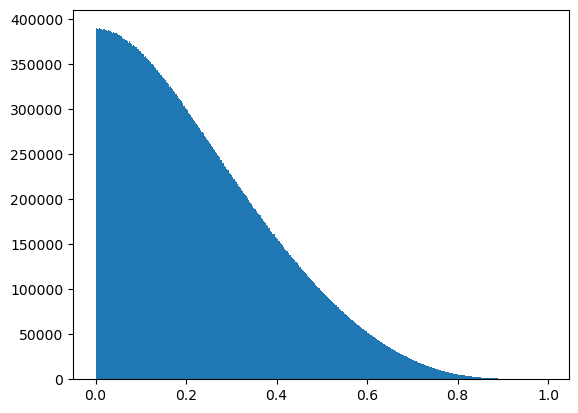

In [12]:
plt.hist(abs(corr_values[0]).sort_values().values, bins=1000)

In [13]:
def plot_cor(corr_series):
    cor = corr_series
    cor.sort_values(inplace=True)
    cor = pd.DataFrame(cor)
    print(cor.describe())
    cor.reset_index(drop=True).plot(figsize=(15,7), style='o-')

                  0
count  16890.000000
mean       0.780456
std        0.100711
min        0.324765
25%        0.716059
50%        0.790062
75%        0.854027
max        0.996220


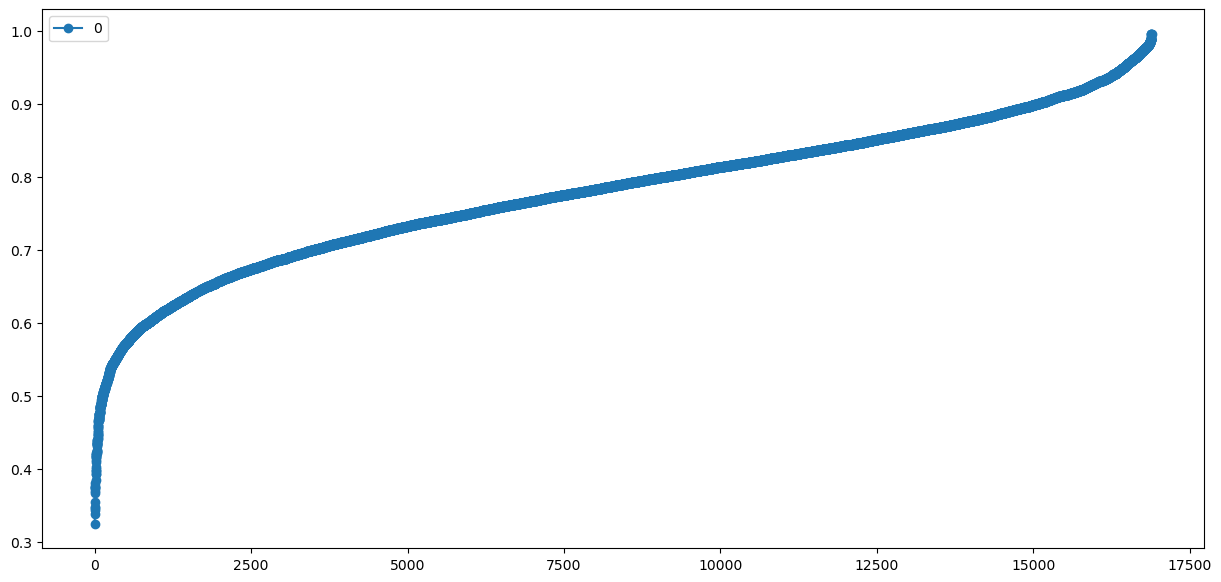

In [14]:
plot_cor(X_corr.max())

# Fisher's Score analysis

In [15]:
fi_scores = fisher_scores(X_train, y_train.to_numpy())

                  0
count  1.689000e+04
mean   3.664059e-01
std    5.786457e-01
min    2.295282e-09
25%    3.237325e-02
50%    1.465558e-01
75%    4.579775e-01
max    9.908299e+00


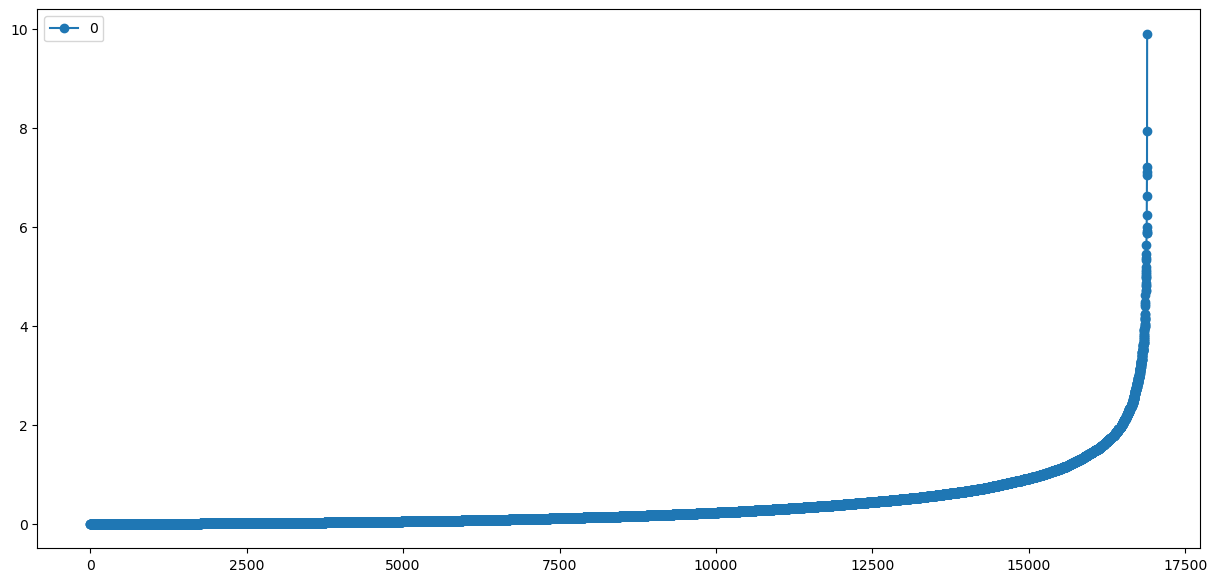

In [16]:
plot_cor(fi_scores.iloc[0])

<Figure size 1500x900 with 0 Axes>

(array([1.656e+03, 6.590e+02, 5.280e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00]),
 array([2.29528241e-09, 4.95415180e-03, 9.90830131e-03, ...,
        9.89839071e+00, 9.90334486e+00, 9.90829901e+00]),
 <BarContainer object of 2000 artists>)

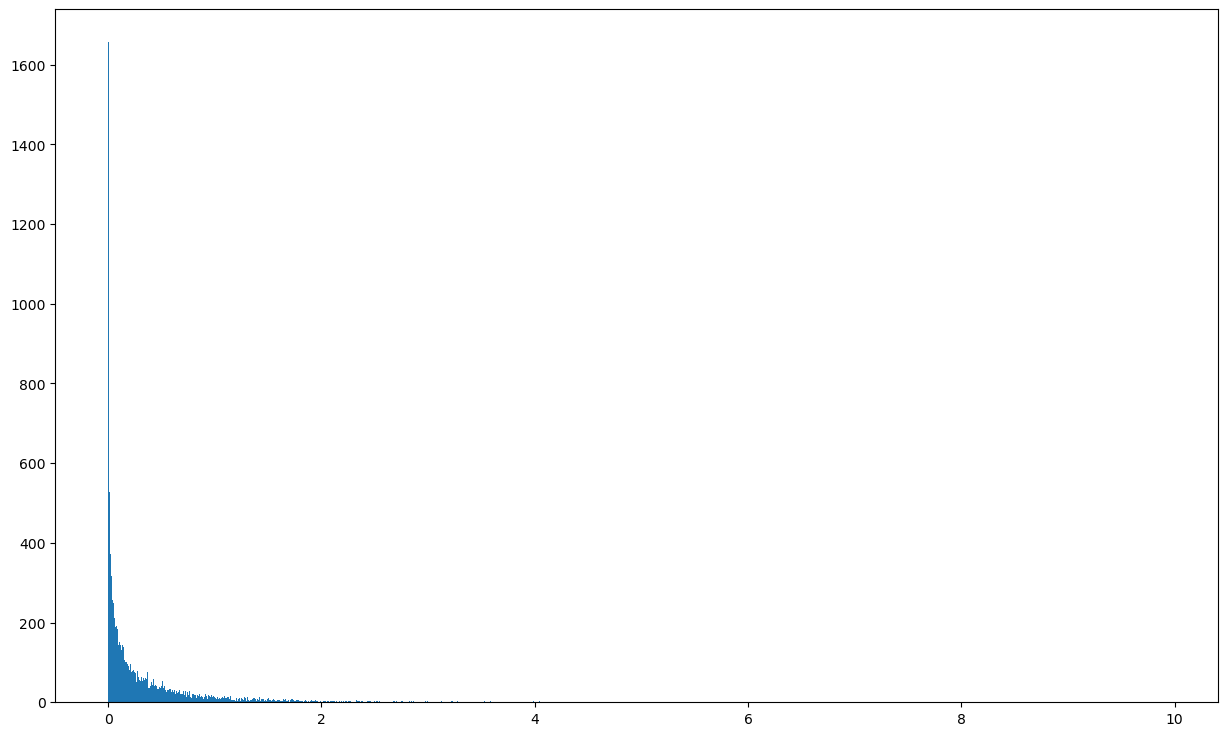

In [17]:
plt.figure(figsize=(15,9))
plt.hist(fi_scores.iloc[0].sort_values(), bins=2000)
plt.show()

In [18]:
fi_scores.iloc[0].quantile(q=0.99)

2.7624189819056206

# Select the 5 features

In [19]:
def extract_features(X_corr, fi_scores_sorted, ranges, threshold):
    
    gene_list_sorted = fi_scores_sorted.index.tolist()
    # starting by selecting the feature with maximum fi score -> ranges[0]
    f = [gene_list_sorted[0]]

    for i, r in enumerate(ranges[1:]):
        last_f_index = fi_scores_sorted.index.get_loc(f[i-1]) + 1
        d_min= 10.0
        f_min = None
        for g in fi_scores_sorted.loc[gene_list_sorted[last_f_index:]].index:
            if (abs(X_corr.loc[f][g]) < threshold).all(axis=0):
                d = np.sqrt(pow((fi_scores_sorted.loc[g].values - r), 2))
                if d < d_min:
                    d_min = d
                    f_min = g 
        print(d_min)        
        print(f_min)        
        f.append(f_min)
        print(fi_scores_sorted.loc[f_min])
    return f

In [20]:
range_fi = np.max(fi_scores.iloc[0]) - np.min(fi_scores.iloc[0])
np.fill_diagonal(X_corr.values, 1)
next_genes = X_corr.loc[fi_scores.iloc[0].idxmax()][abs(X_corr.loc[fi_scores.iloc[0].idxmax()]) < 0.5].index.tolist()
new_max = fi_scores.iloc[0][next_genes].max()
range_fi
#ranges = np.linspace(np.max(fi_scores.iloc[0]), np.min(fi_scores.iloc[0]), 5)
ranges = [np.max(fi_scores.iloc[0])]
ranges.extend(np.linspace(new_max, np.min(fi_scores.iloc[0]), 4))
ranges

9.908299010414225

[9.908299012709508,
 0.47465468929542776,
 0.3164364602953793,
 0.15821823129533086,
 2.295282408582011e-09]

In [21]:
fi_scores_sorted = fi_scores.iloc[0].sort_values(ascending=False).to_frame()

In [22]:
features = extract_features(X_corr, fi_scores_sorted, ranges, 0.5)

[0.]
MT1F
0    0.474655
Name: MT1F, dtype: float64
[0.00024246]
NCKAP1
0    0.316679
Name: NCKAP1, dtype: float64
[3.85112142e-06]
PCBP1
0    0.158222
Name: PCBP1, dtype: float64
[0.]
METTL8
0    2.295282e-09
Name: METTL8, dtype: float64


In [23]:
np.fill_diagonal(X_corr.values, 0)

# Remove High corr genes

In [24]:
corr_matrix_red = X_corr.loc[features]
corr_matrix_red 

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
PIK3C2G,0.267863,-0.400466,-0.385631,-0.710352,-0.494341,-0.717141,-0.643998,-0.161443,0.605358,-0.405132,...,0.463457,0.428277,0.416964,0.474905,0.546863,0.364895,0.376696,0.154930,0.090771,0.536601
MT1F,0.286501,-0.288989,-0.241936,-0.395034,-0.275870,-0.397294,-0.376465,-0.185659,-0.049065,-0.356585,...,0.467840,0.450836,0.455324,0.461860,0.538043,0.468762,0.448290,0.262916,0.121011,0.550662
NCKAP1,0.198502,-0.091142,-0.552898,-0.439003,-0.340861,-0.404412,-0.498295,0.138572,0.314331,-0.538839,...,-0.308758,-0.214264,-0.296124,-0.234187,-0.171486,-0.265380,-0.335126,-0.308270,-0.260796,-0.213258
PCBP1,0.033941,0.646114,0.014051,0.099424,0.114013,0.371707,0.205760,0.337533,-0.145903,-0.023239,...,-0.339234,-0.264314,-0.251337,-0.329802,-0.337158,-0.223586,-0.252061,-0.108293,0.052689,-0.345584
METTL8,-0.014546,-0.298107,-0.009932,-0.002357,0.080802,-0.191177,-0.227945,-0.164901,-0.346799,-0.105511,...,-0.264965,-0.176526,-0.237288,-0.245577,-0.240845,-0.209168,-0.254225,-0.164097,-0.240279,-0.209371


In [25]:
corr_matrix_red = X_corr.loc[features]
genes_to_check = corr_matrix_red.columns[(abs(corr_matrix_red) < 0.50).all(axis=0)].tolist()
print(len(genes_to_check))
genes_to_check = [x for x in  genes_to_check if x not in features]
print(len(genes_to_check))

8953
8948


In [26]:
def remove_high_corr(cm, threshold, fi_scores):
    
    genes_to_drop = []
    genes = cm.index.tolist()
    
    for gene in tqdm.tqdm(genes):
        if gene not in genes_to_drop:
            if np.max(abs(cm.loc[gene])) > threshold:
                gene_list = abs(cm.loc[gene])[abs(cm.loc[gene]) > threshold].index.tolist()
                gene_list.append(gene)
                gene_list.remove(fi_scores.iloc[0][gene_list].idxmax())
                genes_to_drop.extend(gene_list)
    
    return np.unique(genes_to_drop)

gd = remove_high_corr(X_corr.loc[genes_to_check][genes_to_check], 0.7, fi_scores)
X_new = X_train[genes_to_check].drop(gd, axis=1) 
X_new.shape

100%|██████████| 8948/8948 [00:03<00:00, 2494.99it/s]


(115, 4291)

In [27]:
fi_scores = fisher_scores(X_new, y_train.to_numpy())

                  0
count  4.291000e+03
mean   8.665539e-02
std    9.191313e-02
min    4.031671e-09
25%    1.229626e-02
50%    5.276594e-02
75%    1.373499e-01
max    4.323705e-01


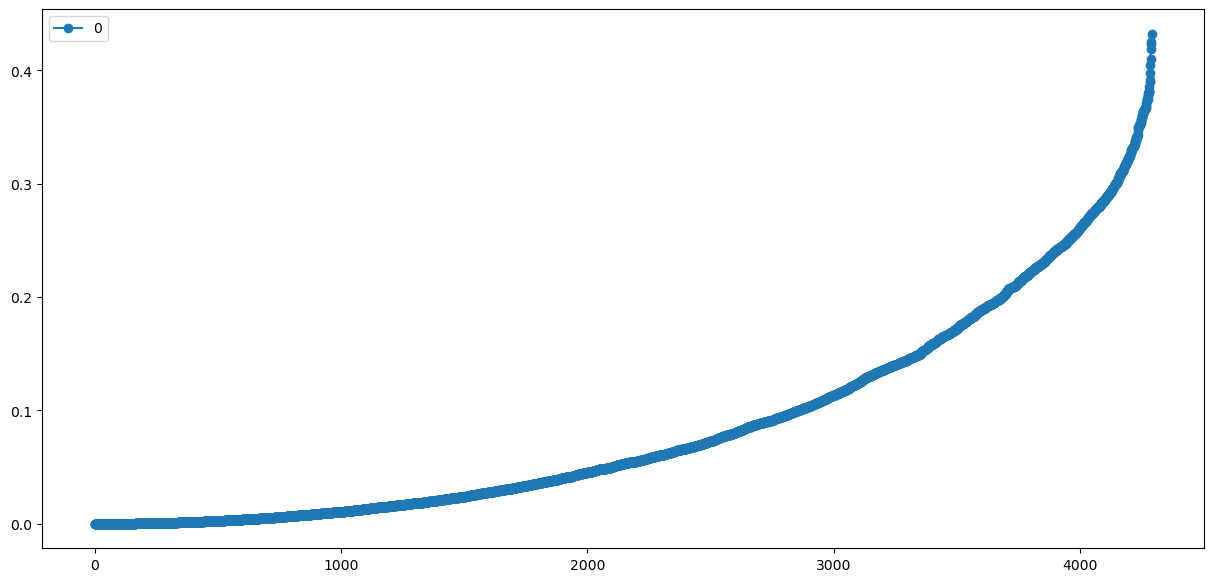

In [28]:
plot_cor(fi_scores.iloc[0])

In [29]:
#most_relevant_genes = ['CDY1', 'MT-ND2', 'MT-CO1']
most_relevant_genes = features

In [30]:
most_relevant_genes
# ['PIK3C2G', 'MT1F', 'NCKAP1', 'PCBP1', 'METTL8']

['PIK3C2G', 'MT1F', 'NCKAP1', 'PCBP1', 'METTL8']

In [31]:
import random
random.seed(int(42))
genes_set = random.sample(X_new.columns.tolist(), k=995)

#  Controlled Dataset Analysis

In [32]:
rpm_log_new = pd.concat([rpm_log[genes_set],rpm_log[most_relevant_genes]],axis=1)
# training and test split
X_train, X_test,  y_train, y_test = train_test_split(rpm_log_new, y, random_state = 42,
                                        test_size = 0.2, stratify=y)

X_train.shape

(115, 1000)

In [33]:
X_corr = X_train.corr()

In [34]:
X_corr = X_train.corr()
np.fill_diagonal(X_corr.values, 0)

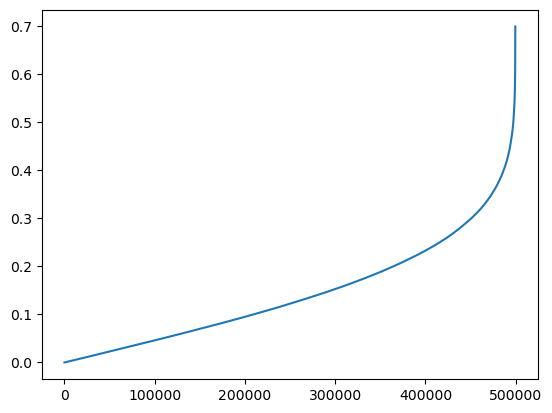

In [35]:
corr_values = X_corr.where(np.triu(np.ones(X_corr.shape), k=1).astype(bool)).stack().reset_index()
plt.plot(np.arange(1, corr_values.shape[0] +1), abs(corr_values[0]).sort_values().values)

(array([1.576e+03, 1.515e+03, 1.529e+03, 1.573e+03, 1.492e+03, 1.578e+03,
        1.549e+03, 1.497e+03, 1.537e+03, 1.566e+03, 1.536e+03, 1.498e+03,
        1.542e+03, 1.603e+03, 1.526e+03, 1.558e+03, 1.522e+03, 1.553e+03,
        1.502e+03, 1.510e+03, 1.557e+03, 1.494e+03, 1.564e+03, 1.524e+03,
        1.521e+03, 1.523e+03, 1.510e+03, 1.472e+03, 1.546e+03, 1.494e+03,
        1.555e+03, 1.548e+03, 1.497e+03, 1.541e+03, 1.506e+03, 1.502e+03,
        1.548e+03, 1.540e+03, 1.563e+03, 1.505e+03, 1.599e+03, 1.495e+03,
        1.514e+03, 1.479e+03, 1.434e+03, 1.482e+03, 1.497e+03, 1.532e+03,
        1.495e+03, 1.616e+03, 1.516e+03, 1.565e+03, 1.510e+03, 1.561e+03,
        1.456e+03, 1.456e+03, 1.484e+03, 1.435e+03, 1.450e+03, 1.473e+03,
        1.513e+03, 1.511e+03, 1.549e+03, 1.451e+03, 1.459e+03, 1.516e+03,
        1.418e+03, 1.483e+03, 1.518e+03, 1.457e+03, 1.571e+03, 1.455e+03,
        1.474e+03, 1.475e+03, 1.477e+03, 1.467e+03, 1.477e+03, 1.497e+03,
        1.445e+03, 1.459e+03, 1.406e+0

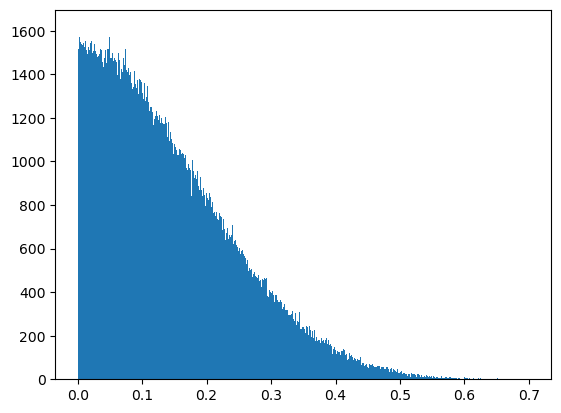

In [36]:
plt.hist(abs(corr_values[0]).sort_values().values, bins=1000)

In [37]:
def plot_cor(corr_series):
    cor = corr_series
    cor.sort_values(inplace=True)
    cor = pd.DataFrame(cor)
    print(cor.describe())
    cor.reset_index(drop=True).plot(figsize=(15,7), style='o-')

                 0
count  1000.000000
mean      0.558419
std       0.066198
min       0.313685
25%       0.514640
50%       0.563907
75%       0.603233
max       0.699762


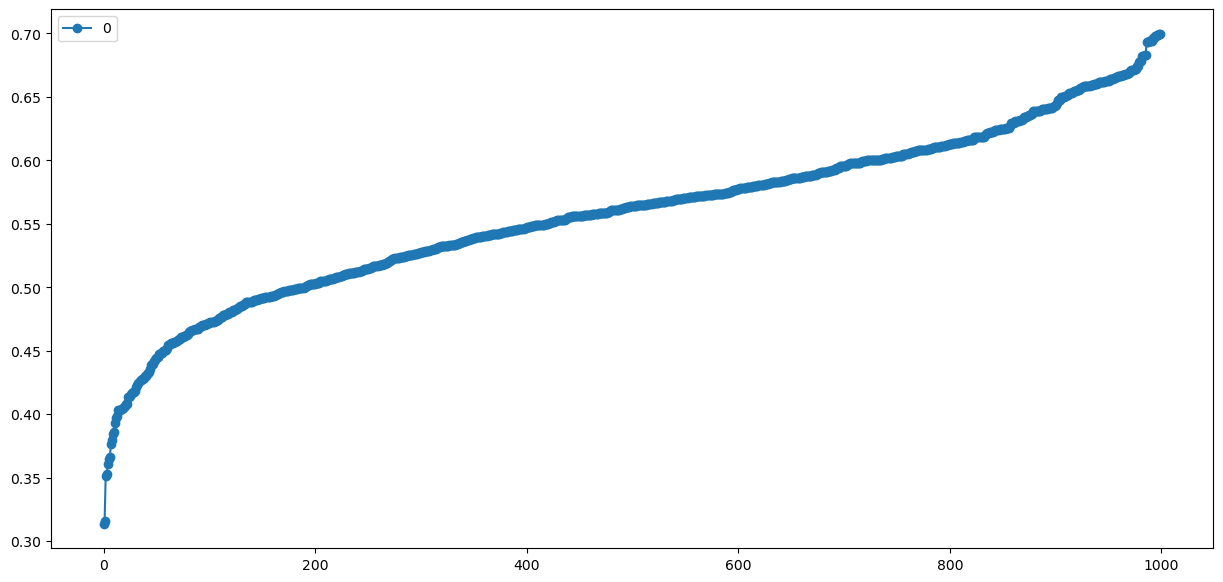

In [38]:
plot_cor(abs(X_corr).max(axis=0))

              0.75
count  1000.000000
mean      0.209154
std       0.030537
min       0.112057
25%       0.190920
50%       0.211677
75%       0.229154
max       0.353538


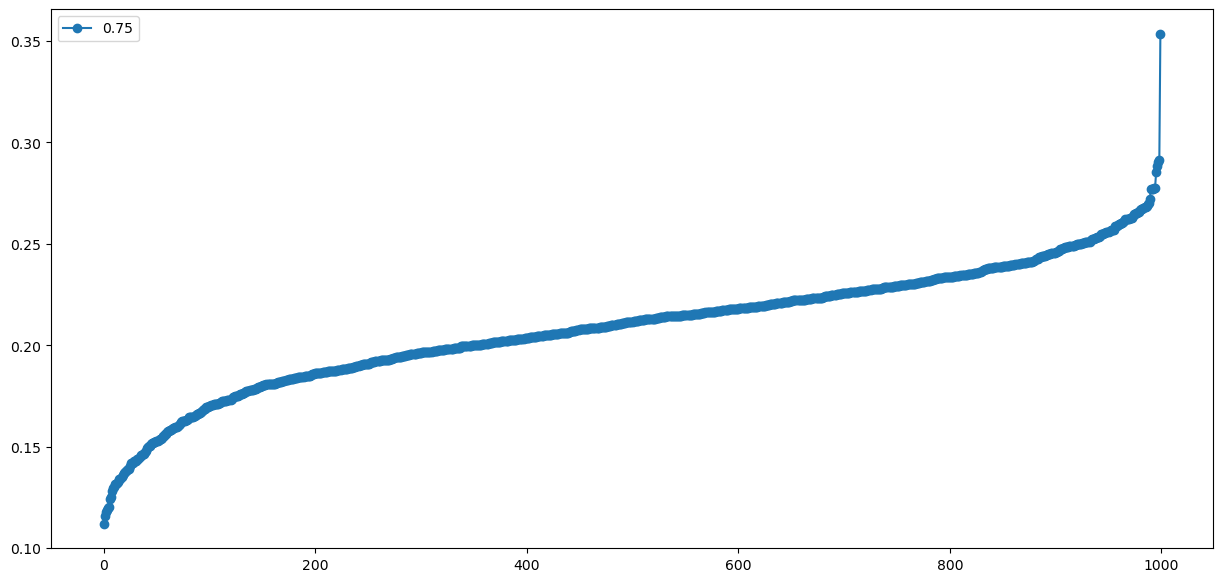

In [39]:
plot_cor(abs(X_corr).quantile(q=0.75))

               0.5
count  1000.000000
mean      0.124456
std       0.019257
min       0.065583
25%       0.112447
50%       0.125807
75%       0.136949
max       0.222010


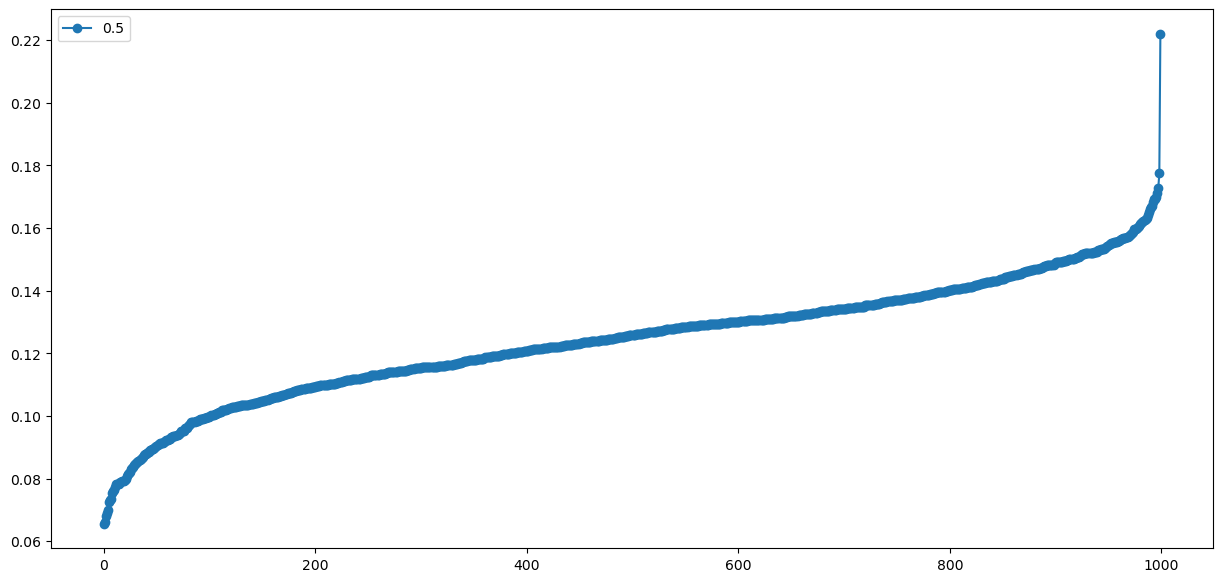

In [40]:
plot_cor(abs(X_corr).quantile(q=0.5))

              0.25
count  1000.000000
mean      0.059201
std       0.009619
min       0.031120
25%       0.053025
50%       0.059613
75%       0.065289
max       0.103246


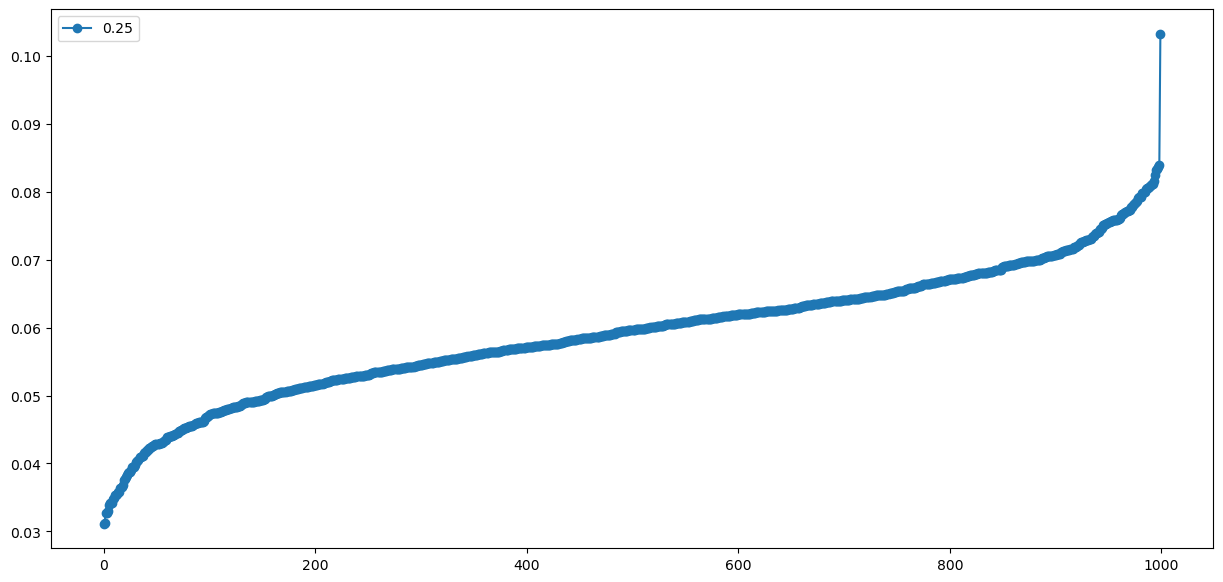

In [41]:
plot_cor(abs(X_corr).quantile(q=0.25))

In [42]:
fi_scores = fisher_scores(X_train, y_train.to_numpy())

In [43]:
fi_scores.iloc[0].sort_values()

METTL8     2.295282e-09
HNRNPL     4.031671e-09
CABP4      3.538518e-08
PTPRA      2.153677e-07
RANBP17    2.009140e-06
               ...     
SIAH2      3.778317e-01
MEF2D      3.799562e-01
RBFA       3.856116e-01
MT1F       4.746547e-01
PIK3C2G    9.908299e+00
Name: 0, Length: 1000, dtype: float64

count    1.000000e+03
mean     9.513405e-02
std      3.240884e-01
min      2.295282e-09
25%      1.013578e-02
50%      5.016379e-02
75%      1.342935e-01
max      9.908299e+00
Name: 0, dtype: float64

<Figure size 1500x900 with 0 Axes>

(array([338., 112.,  90.,  63.,  62.,  43.,  55.,  40.,  33.,  26.,  17.,
         26.,  24.,  16.,  14.,  11.,   9.,  11.,   5.,   3.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

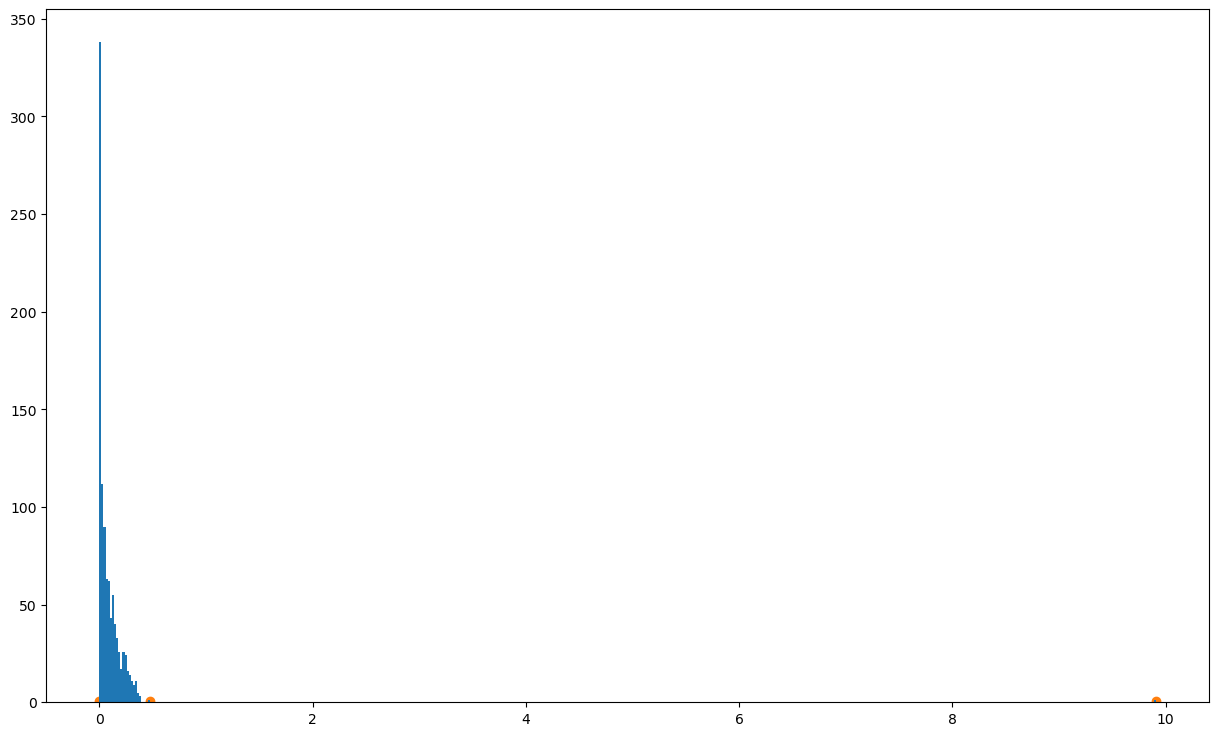

In [44]:
fi_scores.iloc[0].describe()
plt.figure(figsize=(15,9))
plt.hist(fi_scores.iloc[0].sort_values(), bins=500)
plt.scatter(fi_scores.iloc[0][features].values, y = [0.5]*5, color='tab:orange')
plt.show()

In [45]:
save_list(X_train.columns.tolist(), os.path.join(dire_kidney, 'controlled_features.txt'))

# Plots

In [6]:
df =  pd.read_csv(os.path.join(dire_kidney, 'Kidney_df_tr_coding_new.csv'))
df = shuffle(df, random_state=42)

df.set_index(df.columns[0], inplace=True)
df.head()

X = df.drop(['disease', 'is_healthy'], axis=1)
y = y = df['is_healthy']
X.head()
y.head()

rpm = X.div(X.sum(axis=1).values, axis=0) *1e6
rpm_log = np.log2(rpm + 1)

# training and test split
X_train, X_test,  y_train, y_test = train_test_split(rpm_log, y, random_state = 42,
                                        test_size = 0.2, stratify=y)

def load_txt(filename):
    content = []
    with open(filename)as f:
        for line in f:
            content.append(line.strip())
    return content

genes_set = load_txt(os.path.join(dire_kidney, 'controlled_features.txt'))

,disease,is_healthy,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
item_source_id,,,,,,,,,,,,,,,,,,,,,
2b768c1c-c655-47e0-96f2-05bcd8daa73a-geq,Kidney Renal Clear Cell Carcinoma,False,776,5065,631,356,1414,483,1650,32583,...,499973,77222,516184,717410,134268,102158,1651085,326043,81809,468870
932f313c-d695-4061-9abb-b1402aed8030-geq,Kidney Renal Clear Cell Carcinoma,True,800,3944,169,42,111,185,944,31690,...,881539,108561,605969,1227207,345061,122805,1866797,509303,152106,865253
037a8797-3399-411b-892c-fd608c8e3987-geq,Kidney Renal Clear Cell Carcinoma,False,55,3144,107,109,210,318,4154,22096,...,404986,30142,200055,386551,155833,70565,888477,253832,99498,351680
011f1e57-18d7-4cb0-8cb4-af7b151496b9-geq,Kidney Renal Clear Cell Carcinoma,False,174,4890,1453,659,501,688,6139,20666,...,402212,36479,325209,748352,215126,78428,1368108,160487,40699,545113
6f59075b-d162-4db4-ad9a-55e669635252-geq,Kidney Renal Clear Cell Carcinoma,True,221,1353,85,6,19,41,468,6554,...,565163,97159,519260,1031122,260997,91371,1253622,243394,75833,813635


,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
item_source_id,,,,,,,,,,,,,,,,,,,,,
2b768c1c-c655-47e0-96f2-05bcd8daa73a-geq,776,5065,631,356,1414,483,1650,32583,4,826,...,499973,77222,516184,717410,134268,102158,1651085,326043,81809,468870
932f313c-d695-4061-9abb-b1402aed8030-geq,800,3944,169,42,111,185,944,31690,19,270,...,881539,108561,605969,1227207,345061,122805,1866797,509303,152106,865253
037a8797-3399-411b-892c-fd608c8e3987-geq,55,3144,107,109,210,318,4154,22096,0,288,...,404986,30142,200055,386551,155833,70565,888477,253832,99498,351680
011f1e57-18d7-4cb0-8cb4-af7b151496b9-geq,174,4890,1453,659,501,688,6139,20666,0,1368,...,402212,36479,325209,748352,215126,78428,1368108,160487,40699,545113
6f59075b-d162-4db4-ad9a-55e669635252-geq,221,1353,85,6,19,41,468,6554,5,154,...,565163,97159,519260,1031122,260997,91371,1253622,243394,75833,813635


item_source_id
2b768c1c-c655-47e0-96f2-05bcd8daa73a-geq    False
932f313c-d695-4061-9abb-b1402aed8030-geq     True
037a8797-3399-411b-892c-fd608c8e3987-geq    False
011f1e57-18d7-4cb0-8cb4-af7b151496b9-geq    False
6f59075b-d162-4db4-ad9a-55e669635252-geq     True
Name: is_healthy, dtype: bool

In [7]:
corr_matrix = X_train[genes_set].corr()
corr_matrix.head()
corr_values =  corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack().values

,SLC7A14,MCOLN2,XPNPEP1,SEMA4D,TTI2,ANKH,SEC22A,GPR35,WIPI1,CIART,...,ACADVL,SP6,ZMYND10,RERG,ARL16,PIK3C2G,MT1F,NCKAP1,PCBP1,METTL8
SLC7A14,1.000000,-0.057492,-0.195942,-0.095751,0.138555,-0.067118,-0.178177,-0.177786,0.145710,-0.304847,...,-0.238506,-0.229277,-0.084385,0.102353,-0.236369,0.482863,0.354928,0.134362,-0.323362,0.109817
MCOLN2,-0.057492,1.000000,0.309212,0.073615,-0.181860,0.014751,0.003926,0.419876,0.258464,0.012058,...,-0.094354,-0.314893,0.032721,-0.057835,-0.085237,-0.361777,-0.106357,-0.347906,-0.218613,0.448638
XPNPEP1,-0.195942,0.309212,1.000000,0.088752,0.034587,0.105585,0.281876,0.141320,0.235695,0.220734,...,0.264982,0.047335,0.071749,-0.073927,0.105299,-0.337133,-0.345295,-0.012416,0.267286,0.041890
SEMA4D,-0.095751,0.073615,0.088752,1.000000,0.417920,0.011071,0.220525,-0.386334,-0.037077,-0.107737,...,-0.067297,0.272942,0.267603,-0.269303,-0.033004,0.315664,-0.169555,0.135491,-0.080840,-0.031122
TTI2,0.138555,-0.181860,0.034587,0.417920,1.000000,-0.167434,0.316538,-0.527285,-0.068292,-0.340755,...,-0.008495,0.152158,0.207539,0.076308,0.041240,0.480307,0.079470,0.454087,0.065429,-0.135599


In [8]:
sorted(abs(corr_values))

[6.961976720160827e-07,
 7.025603924972693e-07,
 7.117859388164327e-07,
 7.138674032397476e-07,
 1.234557904807194e-06,
 1.3669753575973576e-06,
 1.61939045666213e-06,
 1.7322491790631104e-06,
 2.0031480197472946e-06,
 4.451679648343951e-06,
 4.9126955730143194e-06,
 4.942035778245168e-06,
 7.004777023028025e-06,
 7.085061179111074e-06,
 7.4101049346899624e-06,
 7.740037223705784e-06,
 8.001743701086659e-06,
 8.539066413990122e-06,
 8.608540690765975e-06,
 8.870963503480235e-06,
 9.342656853709028e-06,
 9.485103779141117e-06,
 9.899390025344057e-06,
 9.966091549669845e-06,
 1.075212419520567e-05,
 1.1021093937193587e-05,
 1.104927365572622e-05,
 1.131235340841238e-05,
 1.2172870292608485e-05,
 1.2382111091848165e-05,
 1.3107542448262425e-05,
 1.3655500821790693e-05,
 1.366678412247927e-05,
 1.3815611907954203e-05,
 1.4923276986509007e-05,
 1.5966088233176156e-05,
 1.6127371730425077e-05,
 1.657438143721246e-05,
 1.6986004164578655e-05,
 1.783714303494383e-05,
 1.8409831908238795e-05,
 

<Figure size 2000x1200 with 0 Axes>

(array([1.576e+03, 1.515e+03, 1.529e+03, 1.573e+03, 1.492e+03, 1.578e+03,
        1.549e+03, 1.497e+03, 1.537e+03, 1.566e+03, 1.536e+03, 1.498e+03,
        1.542e+03, 1.603e+03, 1.526e+03, 1.558e+03, 1.522e+03, 1.553e+03,
        1.502e+03, 1.510e+03, 1.557e+03, 1.494e+03, 1.564e+03, 1.524e+03,
        1.521e+03, 1.523e+03, 1.510e+03, 1.472e+03, 1.546e+03, 1.494e+03,
        1.555e+03, 1.548e+03, 1.497e+03, 1.541e+03, 1.506e+03, 1.502e+03,
        1.548e+03, 1.540e+03, 1.563e+03, 1.505e+03, 1.599e+03, 1.495e+03,
        1.514e+03, 1.479e+03, 1.434e+03, 1.482e+03, 1.497e+03, 1.532e+03,
        1.495e+03, 1.616e+03, 1.516e+03, 1.565e+03, 1.510e+03, 1.561e+03,
        1.456e+03, 1.456e+03, 1.484e+03, 1.435e+03, 1.450e+03, 1.473e+03,
        1.513e+03, 1.511e+03, 1.549e+03, 1.451e+03, 1.459e+03, 1.516e+03,
        1.418e+03, 1.483e+03, 1.518e+03, 1.457e+03, 1.571e+03, 1.455e+03,
        1.474e+03, 1.475e+03, 1.477e+03, 1.467e+03, 1.477e+03, 1.497e+03,
        1.445e+03, 1.459e+03, 1.406e+0

Text(0.5, 1.0, 'Distribution of Pearson Correlation')

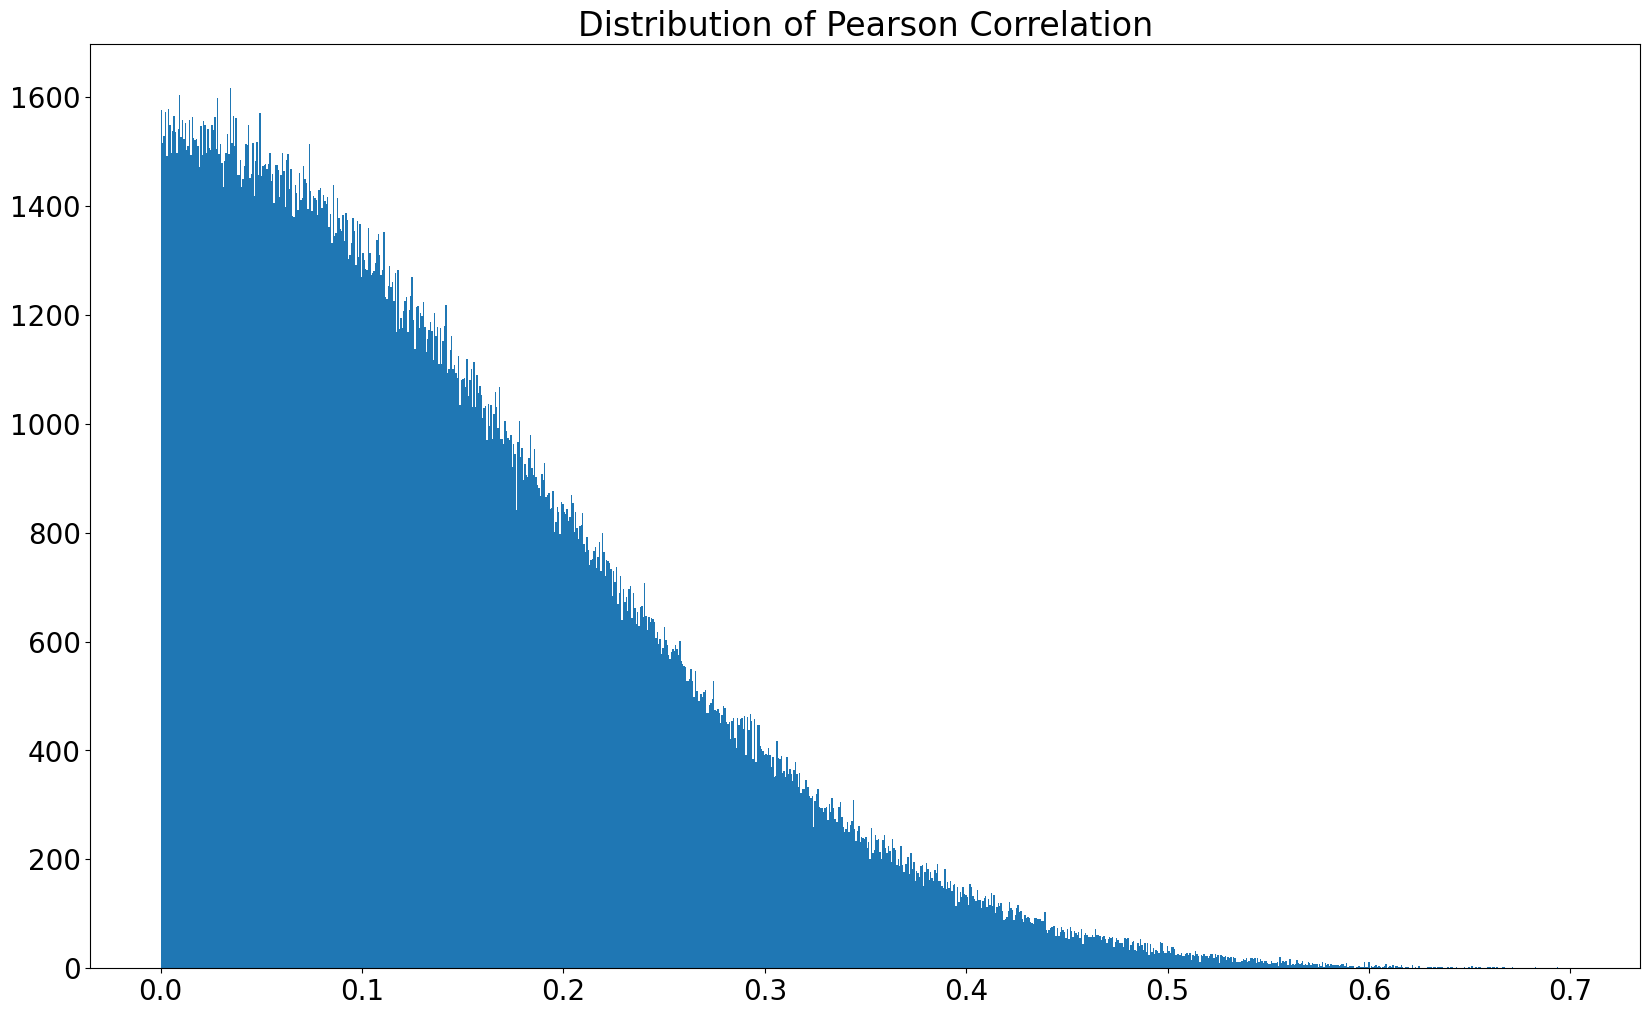

In [9]:
plt.figure(figsize=(20, 12))
plt.hist(abs(corr_values), bins=1000)
plt.title('Distribution of Pearson Correlation', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(os.path.join(dire_results, 'plots/correlation.png'), bbox_inches='tight',pad_inches = 0)

In [10]:
fi_scores = fisher_scores(X_train[genes_set], y_train.to_numpy())

In [11]:
fi_scores.iloc[0].sort_values()

METTL8     2.295282e-09
HNRNPL     4.031671e-09
CABP4      3.538518e-08
PTPRA      2.153677e-07
RANBP17    2.009140e-06
               ...     
SIAH2      3.778317e-01
MEF2D      3.799562e-01
RBFA       3.856116e-01
MT1F       4.746547e-01
PIK3C2G    9.908299e+00
Name: 0, Length: 1000, dtype: float64

count    1.000000e+03
mean     9.513405e-02
std      3.240884e-01
min      2.295282e-09
25%      1.013578e-02
50%      5.016379e-02
75%      1.342935e-01
max      9.908299e+00
Name: 0, dtype: float64

<Figure size 2000x1200 with 0 Axes>

(array([338., 112.,  90.,  63.,  62.,  43.,  55.,  40.,  33.,  26.,  17.,
         26.,  24.,  16.,  14.,  11.,   9.,  11.,   5.,   3.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

Text(0.5, 1.0, 'Distribution of Fisher Scores')

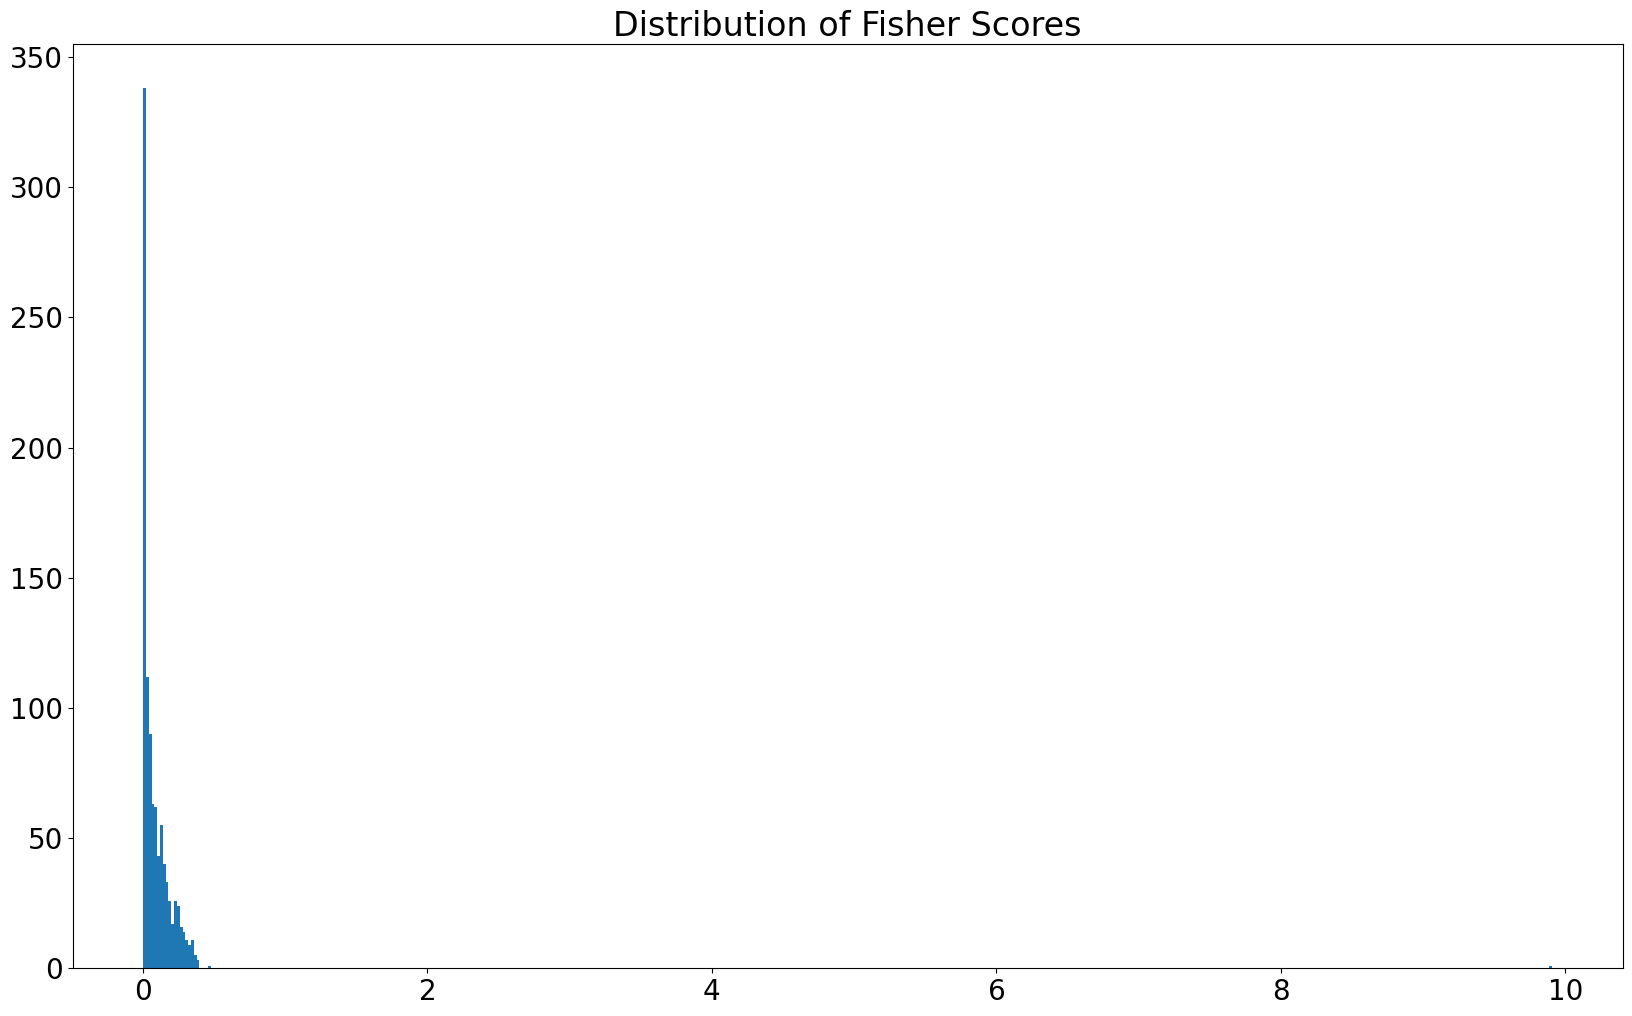

In [12]:
most_relevant_genes = ['PIK3C2G', 'MT1F', 'NCKAP1', 'PCBP1', 'METTL8']
fi_scores.iloc[0].describe()
plt.figure(figsize=(20,12))
plt.hist(fi_scores.iloc[0].sort_values(), bins=500)
#plt.scatter(fi_scores.iloc[0][most_relevant_genes].values, y = [0.5]*5, color='tab:orange')
plt.title('Distribution of Fisher Scores', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(os.path.join(dire_results, 'plots/fi_scores.png'), bbox_inches='tight',pad_inches = 0)

In [13]:
penalties = get_GIS_scores_lasso_func([], X_train[genes_set].columns, k=1, v=1, go=True, reactome=False,
                                       hpo=False, notebook=True, dire_1=dire_1, dire_2=dire_2)

<class 'numpy.int64'>
<class 'numpy.int64'>


100%|██████████| 1000/1000 [00:00<00:00, 13957.89it/s]

Number of genes with no GO annotations:  10


<Figure size 2000x1200 with 0 Axes>

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  3.,  3.,  3.,  3.,
         1.,  3.,  2.,  2.,  4.,  6.,  5.,  3.,  5.,  7.,  4.,  7.,  5.,
        11.,  6.,  4., 13., 12.,  8., 10., 15.,  5., 16.,  8.,  7., 11.,
         6., 14., 16., 10., 13., 14., 14., 11., 12., 13., 11., 14., 17.,
        18.,  9., 15., 17., 14., 16., 11., 16., 19., 10., 14., 27., 16.,
        17.,  7., 11., 11., 10., 11.,  9.,  9.,  9.,  9., 11., 13., 12.,
        15., 10.,  4.,  7., 10.,  5., 11.,  6., 11.,  7.,  3.,  4.,  6.,
        10.,  3.,  5.,  3.,  5.,  6.,  6.,  5.,  4.,  3.,  4.,  9.,  4.,
         3.,  2.,  4.,  4.,  3.,  3.,  2.,  3.,  2.,  3.,  4.,  2.,  2.,
         2.,  4.,  4.,  2.,  0.,  1.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  3.,  0.,  2.,
         4.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1., 21.,
         1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.

Text(0.5, 1.0, 'Distribution of $w_{GIS}$')

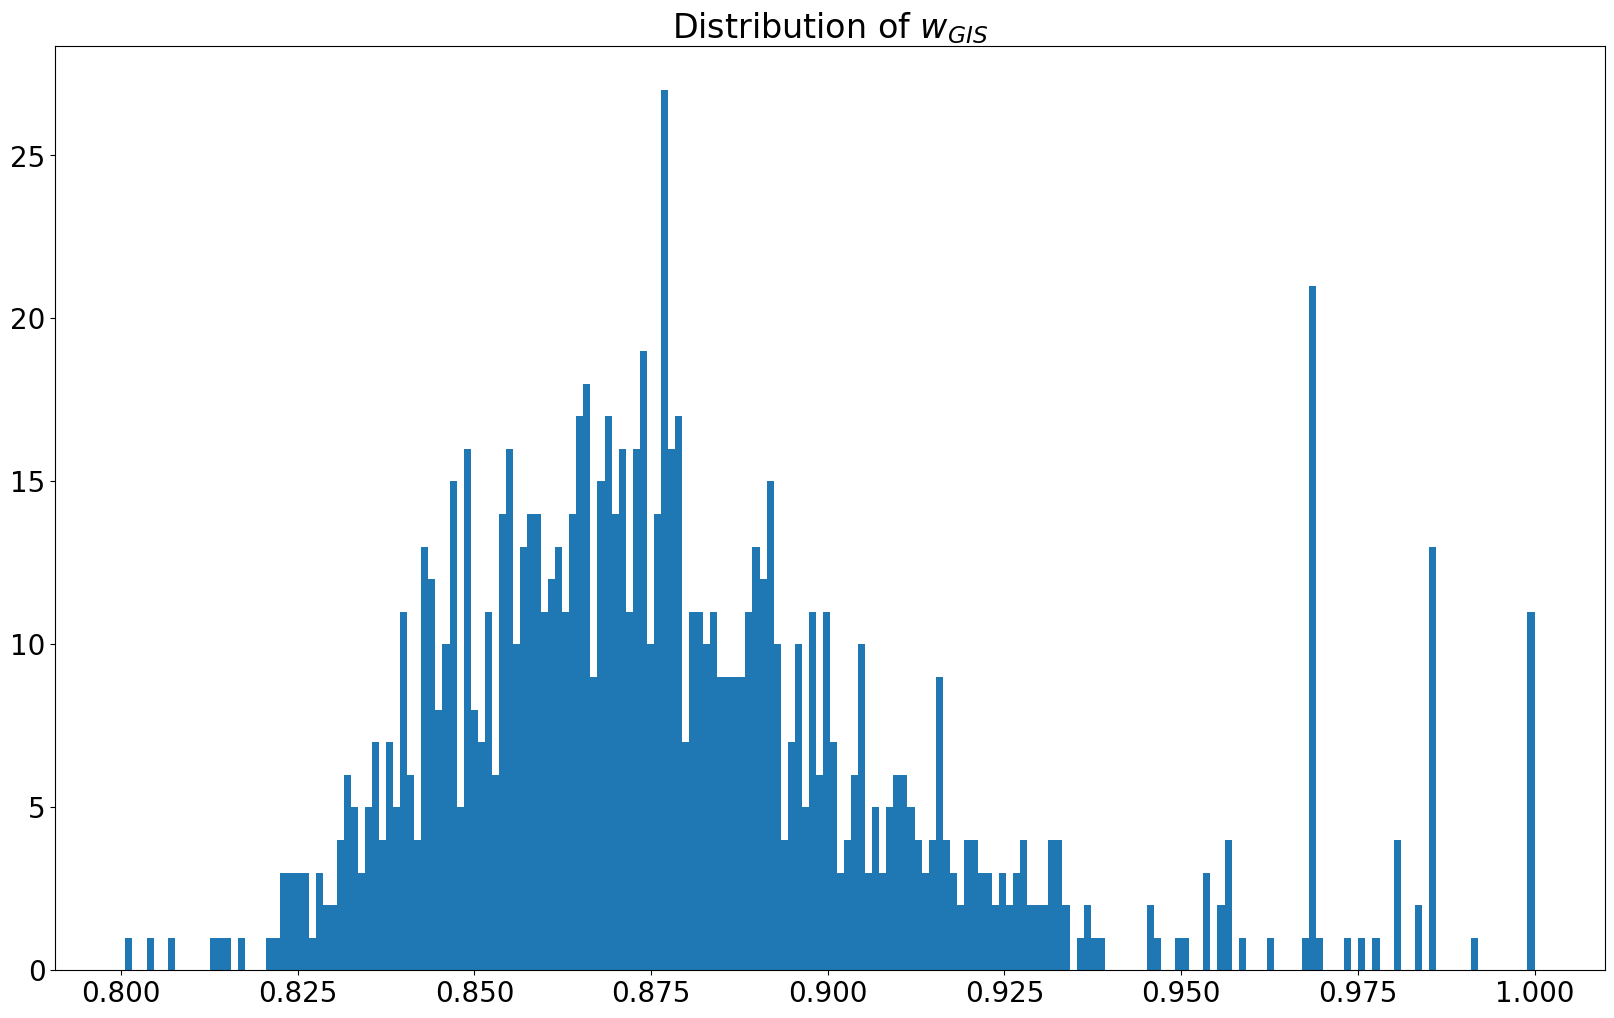

In [16]:
plt.figure(figsize=(20, 12))
plt.hist(penalties, bins=200)
plt.title('Distribution of $w_{GIS}$', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(os.path.join(dire_results,'plots/w_gis.png'), bbox_inches='tight',pad_inches = 0)